<a href="https://colab.research.google.com/github/cuongcutee/aio-2024/blob/main/Background_Subtracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install numpy matplotlib opencv-python

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


In [3]:
def computeDifference(bg_img,input_img):
    #Tính toán giá trị tuyệt đối khác biệt giữa hai hình ảnh
    different_three_channel = np.abs(bg_img-input_img)
    #Chuyển đổi sự khác biệt 3 kênh sang 1 kênh bằng cách tính độ trung bình
    #Điều này làm giảm dữ liệu khác biệt xuống một độ đơn lẻ
    different_single_channel= np.sum(different_three_channel,axis=2)/3.0
    #Chuyển đổi lại sang uint8 để phù hợp với xử lý ảnh
    different_single_channel=different_single_channel.astype('uint8')
    return different_single_channel

In [4]:
def computeDifference(bg_img,input_img):
    #Tính toán giá trị tuyệt đối khác biệt giữa hai hình ảnh
    different_three_channel = np.abs(bg_img-input_img)
    #Chuyển đổi sự khác biệt 3 kênh sang 1 kênh bằng cách tính độ trung bình
    #Điều này làm giảm dữ liệu khác biệt xuống một độ đơn lẻ
    different_single_channel= np.sum(different_three_channel,axis=2)/3.0
    #Chuyển đổi lại sang uint8 để phù hợp với xử lý ảnh
    different_single_channel=different_single_channel.astype('uint8')
    return different_single_channel

In [81]:
def computeBinaryMask(different_single_channel,threshold=70):
    #Áp dụng ngưỡng threshold để tạo nhị phân
    #Các điểm ảnh trắng có sự khác biệt lớn hơn hoặc bằng 15 được đặt là 255, còn lại là 0(đen)
    different_binary=np.where(different_single_channel>=threshold,255,0)
    #Ghép nối mask nhị phân trở lại thành 3 kênh RGB
    binary_binary=np.stack((different_binary,)*3,axis=-1)
    return binary_binary

In [82]:
def replace_BackGround(bg_image1,bg_image2,ob_image):
    #Tính toán khác biệt giữa hình ảnh thứ nhất, và hình ảnh nền thứ 2
    different_single_channel= computeDifference(bg_image1,bg_image2)
    #Tính toán mask nhị phân dựa theo sự khác biệt
    binary_mask=computeBinaryMask(different_single_channel)
    #Thay thế hình nền
    output=np.where(binary_mask==0,ob_image,bg_image2)
    return output



In [83]:
bg_image1=cv2.imread('background1.png')
bg_image2=cv2.imread('background2.png')
ob_image=cv2.imread('/content/object.png')


In [84]:
bg_image1=cv2.resize(bg_image1,(640,480))
bg_image2=cv2.resize(bg_image2,(640,480))
ob_image=cv2.resize(ob_image,(640,480))
#Chuyển đổi hệ BRG sang RGB
bg_image1 = cv2.cvtColor(bg_image1, cv2.COLOR_BGR2RGB)
bg_image2=cv2.cvtColor(bg_image2,cv2.COLOR_BGR2RGB)
ob_image=cv2.cvtColor(ob_image,cv2.COLOR_BGR2RGB)

In [85]:
output_image=replace_BackGround(bg_image1,bg_image2,ob_image)


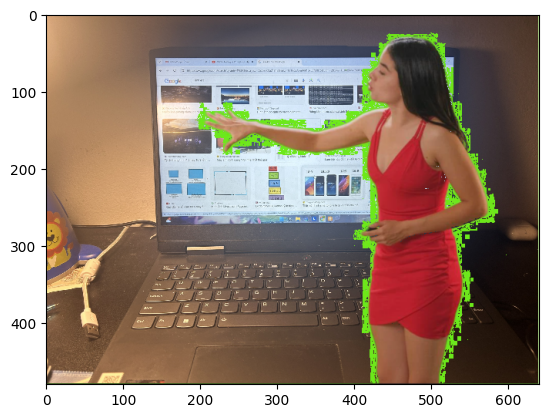

In [86]:
plt.imshow(output_image)